<a href="https://colab.research.google.com/github/quarcs-lab/project2022p/blob/master/project2022p_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/quarcs-lab/project2022p/blob/master/project2022p_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>  (v1.0)


<center>
<h1> Exploring economic activity from outer space: A Python notebook for processing and analyzing satellite nighttime lights </h1>
<!-- <h3> Carlos Mendez<sup>1</sup> Ayush Patnaik<sup>2</sup>

</h3>
</center>
<center>
<h3>
1. Nagoya University
2. xKDR Forum
</h3>
</center> -->

<center> <h2> Abstract </h2>

Nighttime lights (NTL) data are increasingly used as a proxy for monitoring national, subnational, and supranational economic activity. These data offer advantages over traditional economic indicators such as GDP, including greater spatial granularity, timeliness, lower cost, and comparability between regions regardless of statistical capacity or political interference. Despite these benefits, the use of NTL data in regional science has been limited. This is in part due to the lack of accessible methods for processing and analyzing satellite images. To address this issue, this paper presents a user-friendly geocomputational notebook that illustrates how to process and analyze satellite NTL images. The evolution of regional disparities in India is presented as an illustrative example. The notebook first introduces a cloud-based Python environment for visualizing, analyzing, and transforming raster satellite images into tabular data. Next, it presents interactive tools for exploring the space-time patterns of the tabulated data. Finally, it describes methods for evaluating the usefulness of NTL data in terms of their cross-sectional predictions, time-series predictions, and regional inequality dynamics.


**Keywords:** satellite nighttime lights, regional income, zonal statistics, exploratory data analysis, panel data analysis, inequality dynamics, Jupyter notebook

## 1 Introduction


Nighttime lights (NTL) data have become a widely recognized proxy to monitor economic activity at the national, subnational, and supranational levels (Chen, Nordhaus, 2011; Henderson et al., 2012; Sutton et al., 2007). The use of NTL data can offer considerable advantages over traditional economic indicators, such as GDP. For example, NTL data provide greater spatial granularity, are more timely, and are less costly to construct than GDP. Furthermore, NTL data are comparable between multiple regions, regardless of differences in statistical capacity, political interference, or informal activities.

In regional science, several topics could benefit from the use of nighttime light data. One main topic is the study of regional development and inequality. Researchers have used nighttime light data as a proxy for subnational income and have found evidence of increasing or decreasing regional inequality over time (Lessmann, Seidel, 2017). These data can also be used to examine the relationship between regional development and various factors, such as ethnic inequality (Alesina et al., 2016). Additionally, nighttime light data can be used to analyze the impact of localized policies (Kim et al., 2024). Overall, nighttime light data provide further opportunities to study economic performance and development at the subnational level, particularly in regions where reliable data are difficult to obtain (see the survey article of Gibson et al. (2020) for a more comprehensive overview the use of NTL in economics and Zheng et al. (2023) for an overview of urban applications).

Despite their potential benefits, the latest NTL data products (Elvidge et al., 2017, 2021; Li et al., 2020; Román et al., 2018) have had limited use in the regional science literature. One plausible reason is the lack of accessible methods for processing and analyzing satellite images. Specifically, the processing of large raster-based satellite images into tabular data has made it difficult for researchers to use the latest satellite data products. To address this issue, we introduce a geocomputational notebook that provides a step-by-step guide on how to process and analyze recent satellite NTL images. To illustrate the functionality of this notebook, we study the evolution of regional disparities in India. Rapid economic growth, coupled with notable regional imbalances in India, can be an interesting topic for evaluating the potential uses and limitations of nighttime light data.

Accessing, processing, and analyzing satellite data requires a basic understanding of remote sensing and programming principles. To lessen the learning curve and encourage the use of these data, a growing number of researchers have been sharing their data processing routines as libraries or functions across several programming languages. For instance, Falchetta (2023), Miethe (2023) and Njuguna (2020) have developed R libraries dedicated to extracting data from nightlight satellite imagery. Raschky (2020) has provided Python functions for the same purpose. Patnaik et al. (2023) have assembled a Julia library that specializes in processing nightlight imagery. With the same motivation, our contribution lies in presenting an alternative, yet complementary, approach for processing and analyzing satellite imagery. By leveraging the pedagogical and computational features of Jupyter notebooks (Rowe et al., 2020; Reades, 2020; Chen et al., 2020), our cloud-based geocomputational Jupyter notebook provides an integrated environment for efficient code execution, interactive data visualization, and narrative documentation.

The notebook begins by introducing a cloud-based Python environment for visualizing and transforming raster images into tabular data. The notebook then presents interactive tools to explore the space-time patterns of the tabulated data. These tools allow researchers to better understand both the spatial distribution and the temporal trends of NTL data. To develop a sense of the informational content of NTL, the space-time patterns of GDP are also presented. Finally, the notebook illustrates methods for evaluating the usefulness of NTL data in terms of cross-sectional predictions, time-series predictions, and regional inequality dynamics.

## 2 Cloud-based environment


Modern computational notebooks allow us to present code in conjunction with descriptive text, equations, visualizations, and tables in a single document (Rowe et al., 2020). The use of such notebooks greatly enhances the reproducibility and transparency of scientific research. Despite the advances offered by computational notebooks, a significant challenge persists in the reproducibility of the computational environment, which is essential for
generating consistent results. Especially for geospatial analysis, a notebook user still needs to download, install, and manage numerous computational libraries and their dependencies.

Cloud-based environments such as [Google Colab](https://colab.research.google.com/),  [Anaconda Cloud](https://anaconda.cloud/) or [Deepnote](https://deepnote.com/) offer solutions to the reproducible-environment problem. They operate on cloud computers that can be reproduced with a single click. To process and analyze satellite images in a fully reproducible cloud-based environment, we host our notebook on Google Colab: https://colab.research.google.com/github/quarcs-lab/project2022p/blob/master/project2022p_notebook.ipynb.  This cloud-based environment can be easily duplicated, run, and extended after logging in with a Google account. Furthermore, when operating in the cloud, the “forms” feature of Google Colab’s code cells facilitates the display, folding, and parameterization of code.

At its minimum, this environment requires the libraries shown in Table 1. The results were produced using Python 3.10.12. To start, we install the required Python libraries that are not pre-installed in Google Colab.


| Package         | Version | Description                                                                                        |
|------------------|-------------------|----------------------------------------------------------------------------------------------------|
| numpy      | 1.23.5            | Library that provides functions for mathematical operations and handling arrays                         |
| pandas     | 1.5.3             | Library that provides a data frame class and functions to manipulate data frames                         |
| geopandas   | 0.13.2            | Library that helps work with spatial data                                                               |
| matplotlib  | 3.7.1 | Plotting library, including plotting functions                                                       |
| contextily  | 1.3.0             | Library that helps to add base layers to maps                                                       |
| rasterio    | 1.3.9             | Library for raster data processing                                                                  |
| linearmodels | 4.27             | Library for linear regressions, including panel data analysis                                      |
| inequality | 1.0.0             | Library that provides methods for measuring inequality                                               |
| os          |                   | Operating system interface                                                                          |
| requests   | 2.31.0            | HTTP library for making requests in Python                                                         |
| glob        |                   | File path pattern matching                                                                          |
| shutil     |                   | High-level file operation utilities                                                                |
| bs4        |                   | BeautifulSoup library for parsing HTML and XML                                                      |
| json        |                   | Library for working with JSON data                                                                 |
| gzip        |                   | Library for compressing and decompressing files using the gzip format                                |
| plotly |          5.15.0         | High-level library for creating interactive visualizations with Plotly                              |                                               |
| cufflinks   | 0.17.3            | Productivity Tools for Plotly + Pandas                                                             |
| mpl_toolkits |                   | Tool for advanced axes layout in Matplotlib                                                         |                                                 |
| linearmodels |      4.27             | Library for performing linear regressions

**Table 1:** List of required packages and standard libraries

In the next cell, we load the libraries.

In [1]:
# @title CODE: Install libraries

!pip install \
numpy==1.23.5 \
pandas==1.5.3 \
geopandas==0.13.2 \
matplotlib==3.7.1 \
contextily==1.3.0 \
rasterio==1.3.9 \
folium==0.14.0 \
kaleido==0.2.1 \
mapclassify==2.6.0 \
linearmodels==4.27 \
inequality==1.0.0 \
cufflinks==0.17.3 \
requests==2.31.0 \
plotly==5.15.0 \
--quiet

In [2]:
# @title CODE: Import libraries

import numpy as np  # Library that provides functions for mathematical operations and handling arrays
import pandas as pd  # Libaray that provides a data frame class and functions to manipulate data frames
import geopandas as gpd  # Library that helps working with spatial data


import matplotlib.pyplot as plt  # Function for 2D plotting
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import (
    make_axes_locatable,
)  # Function to create a new axis on a plot

import contextily as cx  # Library that helps adding OSM base layer to plots.

import plotly.express as px  # Library for interactive plotting

# Libraries to allow plotly to be offline and show plots in a jupyter notebook
import plotly.io as pio
import plotly.graph_objects as go
import cufflinks as cf

cf.go_offline()

import rasterio  # Library for raster data processing
from rasterio import plot as rioplot  # Function to plot raster data
from rasterio.mask import (
    mask,
)  # Function for masking raster data using shapefile for zonal statistics

# linearmodels library provides helps performing regressions
from linearmodels import PooledOLS  # Function to perform pooled OLS regression
from linearmodels import PanelOLS  # Function to perform OLS regression on panel data
from linearmodels import (
    BetweenOLS,
)  # Function to compute the between estimator of an OLS regression
from linearmodels.panel.results import (
    compare,
)  # Function compare results of an OLS regression

import inequality  # Library that provides methods for measuring spatial inequality

import os  # Operating system interface
import requests  # HTTP library for making requests in Python
import glob  # File path pattern matching
import shutil  # High-level file operation utilities
from bs4 import BeautifulSoup  # BeautifulSoup library for parsing HTML and XML
import json  # Library for working with JSON data
import gzip  # Library for compressing and decompressing files using the gzip format

We set parameters to abbreviate the tables that will be displayed.


In [3]:
# @title CODE: Set parameters

# Abbreviate displayed tables

# Set precision to 4
pd.set_option("display.precision", 4)

# Set max columns to 7
pd.set_option("display.max_columns", 7)

# Set max rows to 10
pd.set_option("display.max_rows", 10)

# Set renderer for plotly

if 'COLAB_GPU' in os.environ:
    pio.renderers.default = "colab"
elif 'NOTEBOOK_MODE' in os.environ and os.environ['NOTEBOOK_MODE'] == 'colab':
    pio.renderers.default = "colab"

## 3 Data


In this notebook, we use three datasets: (1) satellite nighttime light images from Elvidge et al. (2021); (2) subnational income per capita from Smits and Permanyer (2019); and (3) administrative boundaries for the states of India from Smits and Permanyer (2019). To work with these datasets, we first need to define our analysis period and organize the directory structure of our
computational environment. We define the start and end years as global variables. This definition restricts the study to a particular time frame, allowing us to focus on a particular period of interest. The start and end years can take values from 2014 to 2021.

Note: While minimal adjustments enable the use of images of 2012 and 2013, it's important to acknowledge that they have not undergone stray light correction.  

In [4]:
# @title CODE: Define start and end years
START_YEAR = 2014  # @param {type:"integer"}

END_YEAR = 2019  # @param {type:"integer"}

Next, we define the directory paths where the datasets will be downloaded. In the same cell, we also define the paths where figures and tables will be saved during the execution of the notebook. Appendix B gives more details about these folders and the files which will be saved in them.

Next, we create the directories and delete the `sample_data`directory of Colab.

In [5]:
# @title CODE: Define paths and directories
# Remove sample_data folder provided by Colab.
!rm -rf sample_data
# Define path constants
FIGURES_DIRECTORY = "figures"
TABLES_DIRECTORY = "tables"
VECTOR_DIRECTORY = "data/vector"
TABULAR_DIRECTORY = "data/tabular"
RASTER_DIRECTORY = "data/raster"

# Check and create folders using a loop
for path in [
    FIGURES_DIRECTORY,
    TABLES_DIRECTORY,
    VECTOR_DIRECTORY,
    TABULAR_DIRECTORY,
    RASTER_DIRECTORY,
]:
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created     folder: {path}")

### 3.1 Satellite nighttime light images

The Defense Meteorological Satellite Program Operational Linescan System (DMSP-OLS) and the Visible Infrared Imaging Radiometer Suite (VIIRS) are two satellite sensors that have been used to construct global nighttime lights datasets (Levin et al., 2020; Elvidge et al., 2013; Gibson et al., 2020; Donaldson and Storeygard, 2016). The DMSP-OLS, launched in the 1970s by the US Air Force, was the first sensor used to systematically collect low-light imaging data of the earth at night. The resulting DMSP nighttime lights dataset
has been widely used since the 1990s to study socioeconomic activity (Henderson et al., 2012; Chen, Nordhaus, 2011; Gibson et al., 2020). In contrast, the VIIRS sensor was launched by NASA and NOAA in 2011 on the Suomi NPP satellite. In remote sensing and natural sciences, the higher-quality VIIRS data quickly began to replace DMSP data in many applications (Elvidge et al., 2013, 2017, 2021). In economics and social sciences, however, the use of DMSP data is still predominant, and concerns have been raised about the measurement errors associated with these data (Abrahams et al., 2018; Gibson and Boe-Gibson, 2021; Gibson, 2021; Zhang et al., 2023).

The VIIRS nighttime light data has several advantages over the DMSP data. The
VIIRS dataset has a much finer spatial resolution, 15 arc-second grids compared to the 30 arc-second grids for DMSP. The measurement units of the VIIRS data are radiance values in radiometric units, specifically nanowatts per square centimeter per steradian (nW/cm2/sr). On the other hand, DMSP data employ radiance values measured in digital numbers (DN). Both higher resolution and more precise measurement units allow the VIIRS data to provide a more accurate delineation between urban centers and rural areas. In addition, the VIIRS sensors have a greater radiometric range, better calibration, and less burring, providing more consistent measurements over time and across space. However, VIIRS data currently have shorter time series than the DMSP data, spanning only 2012-present compared to 1992-2013 for DMSP. This makes the VIIRS data less useful for studying long-term economic and urban trends. Overall, the VIIRS data offer superior features for cross-sectional and time series analyses, but
researchers requiring long-time series may still need to use the DMSP data despite their flaws.

In this notebook, we focus on analyzing the annual VIIRS 2.1 dataset, as pre-processed by Elvidge et al. (2021). These authors employed monthly averages of radiance without cloud interference to create a series of global nighttime light images spanning 2012-2019. The pre-processing steps involved the exclusion of biomass burning, aurora, and background noise. Outliers were eliminated through a twelve-month median. Areas lacking detectable lighting were identified using a statistical texture measure. Additionally, the images exhibit enhanced noise filtering, attributed to an extended threshold applied
over multiple years. As a result of this pre-processing, the images provide high spatial-temporal consistency and facilitate the analysis of changes over time. The raster images associated with this dataset are available in the website of Earth Observation Group (EOG) of the Payne Institute for Public Policy of the Colarado School of Mines: https:
//eogdata.mines.edu/products/vnl. For complementary and exploratory purposes,
Appendix C briefly illustrates how to access and analyze the calibrated version of the DMSP dataset that has been pre-processed by Li et al. (2020). The raster images associated with this dataset (Li et al., 2021) are available in Figshare: [https://doi.org/10.6084/m9.figshare.9828827.v5](https://doi.org/10.6084/m9.figshare.9828827.v5)

The VIIRS nighttime lights data can be downloaded via EOG’s API by creating a free account at the registration page: https://eogdata.mines.edu/products/register/. After registration, the values of the USERNAME and PASSWORD need to updated in the following cell. The CLIENT_ID and CLIENT_SECRET are public, but they may change from time to time, and if the cell fails to run, the values should be updated. The latest values can be found on EOG’s [registration page](https://eogdata.mines.edu/products/register/).

In [6]:
# @title CODE: Write your EOG's access credentials

## Make an account at EOG: https://eogdata.mines.edu/products/register/
USERNAME = "ayushpatnaik@gmail.com" # @param {type:"string"}
PASSWORD = "n3zaCXM5TtZV3Hb"  # @param {type:"string"}
CLIENT_ID = "eogdata_oidc" # @param {type:"string"}
CLIENT_SECRET = "2677ad81-521b-4869-8480-6d05b9e57d48" # @param {type:"string"}


def download_link(link):
    """
    Function to download image from EOG using the API

    Parameters:
    -----------
    link : str

    Returns:
    --------
    None

    Notes:
    ------
    Downloads image in RASTER_DIRECTORY
    """
    output_file = os.path.basename(link)
    output_file = os.path.join(
        RASTER_DIRECTORY, output_file
    )  # Construct full path with folder
    if os.path.isfile(output_file):
        print(f"File {output_file} already exists. Skipping download.")
        return

    params = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "username": USERNAME,
        "password": PASSWORD,
        "grant_type": "password",
    }
    token_url = (
        "https://eogauth.mines.edu/auth/realms/master/protocol/openid-connect/token"
    )
    response = requests.post(token_url, data=params)
    access_token_dict = json.loads(response.text)
    access_token = access_token_dict.get("access_token")
    data_url = link
    auth = "Bearer " + access_token
    headers = {"Authorization": auth}
    response = requests.get(data_url, headers=headers)

    with open(output_file, "wb") as f:
        f.write(response.content)
    print(f"File {output_file} downloaded successfully.")


base_url = "https://eogdata.mines.edu/nighttime_light/annual/v21/{}/"

for year in range(
    START_YEAR, END_YEAR + 1
):  # loop through years START_YEAR to END_YEAR
    url = f"https://eogdata.mines.edu/nighttime_light/annual/v21/{year}/VNL_v21_npp_{year}_global_vcmslcfg_c202205302300.median_masked.dat.tif.gz"
    download_link(url)

File data/raster/VNL_v21_npp_2014_global_vcmslcfg_c202205302300.median_masked.dat.tif.gz already exists. Skipping download.
File data/raster/VNL_v21_npp_2015_global_vcmslcfg_c202205302300.median_masked.dat.tif.gz downloaded successfully.
File data/raster/VNL_v21_npp_2016_global_vcmslcfg_c202205302300.median_masked.dat.tif.gz already exists. Skipping download.
File data/raster/VNL_v21_npp_2017_global_vcmslcfg_c202205302300.median_masked.dat.tif.gz already exists. Skipping download.
File data/raster/VNL_v21_npp_2018_global_vcmslcfg_c202205302300.median_masked.dat.tif.gz already exists. Skipping download.
File data/raster/VNL_v21_npp_2019_global_vcmslcfg_c202205302300.median_masked.dat.tif.gz already exists. Skipping download.


The loop runs from START_YEAR to END_YEAR and fetches the files containing VIIRS
V2.1 images for each year. The downloaded files are compressed, and need to be extracted to be used. For illustration and computational efficiency purposes, we focus only on the 2014-2019 period. An analysis for other years (2012, 2020-onwards) is also possible by adjusting the names of the decompressed files in a sequential way.

In [7]:
# @title CODE: Extract downloaded images

# Get the current working directory
current_dir = os.getcwd()

# Find all .gz files in the data/raster folder

for file in glob.glob(os.path.join(current_dir, RASTER_DIRECTORY, "*.gz")):
    with gzip.open(file, "rb") as compressed_file, open(
        file[:-3], "wb"
    ) as extracted_file:
        shutil.copyfileobj(compressed_file, extracted_file)  # Stream data directly
    os.remove(file)

print("Successfully extracted all .gz files!")

Successfully extracted all .gz files!


### 3.2 Regional income and administrative boundaries

Smits and Permanyer (2019) have recently compiled a database of socioeconomic indicators at the subnational level. The dataset is based on the first-level administrative regions. As an indicator of subnational GDP per capita, we use Gross National Income per capita in thousands of US dollars (2011 PPP) from this database. We utilize version 4.0 of the dataset, which also includes a shapefile containing the boundaries of the administrative regions. All these datasets are available from the Global Data Lab website: [https://globaldatalab.org ](https://globaldatalab.org).

A small part of the dataset, for the Indian states, has been downloaded and uploaded to GitHub to facilitate the exposition of this notebook. In the code below, the subnational GDP file of India is loaded as a pandas dataframe.

In [8]:
# @title CODE: Read state level GDP data from a csv file

df_GDP = pd.read_csv(
    "https://gist.github.com/cmg777/150c0b93ae8eb14fec9babdf4f5f8fc4/raw/2af006ed2b80cdb3ef9b6dd13ccc8a450c168765/df_GDP_India36.csv"
)

Next, we load the vector file that contains the borders of Indian states using `geopandas`. The file is loaded into a `GeoDataFrame`, which has a column that contains geometric information in the form of polygons. This column is utilized for conducting geometric operations, such as spatial joins and intersections, as well as for visualizing the data using tools like `matplotlib`.

In [9]:
# @title CODE: Read administrative boundaries

# The boundaries of states of India are stored in gdf_india36.geojson. The file is loaded using the read_file function from geopandas
map_url = "https://gist.github.com/cmg777/19c25af8fcfe2291cfb6f9abf141d45a/raw/48e1489e97f975c5a2253d2068cf99a3c2d0cff3/gdf_india36.geojson"

polygons_files = gpd.read_file(map_url)

## 4 Processing satellite nighttime images


### 4.1 Importing and visualizing satellite images

We define a function to load a satellite image (raster file) for a given year. The function finds the path of the file corresponding to the provided year value, and loads it using `rasterio`.

In [10]:
# @title CODE: Define function to load satellite images


def load_raster(year):
    """
    Load a raster file based on the provided time identifier.

    Parameters:
    -----------
    year : int

    Returns:
    --------
    rasterio.io.DatasetReader
    An opened raster file dataset ready for further operations.

    Example:
    --------
    >>> raster_2014 = load_raster(2014)
    >>> type(raster_2014)
    <class 'rasterio.io.DatasetReader'>

    Notes:
    ------
    Modify the path in the function if your file structure
    or naming convention differs.
    """
    raster_path = f"{RASTER_DIRECTORY}/VNL_v21_npp_{year}*"
    return rasterio.open(glob.glob(raster_path)[0])

We next extract the bounding box of the country map (vector file), which is the latitude and longitude extent of India. This allows us to crop the NTL images to values only for our area of interest. This step can reduce memory usage, computation time and make it easier to visualise the NTL around the area of interest.

In [11]:
# @title CODE: Extract the bounding box using the boundaries of the map

polygons_files_bbox = polygons_files.total_bounds

Next, we utilize `load_raster` to load the NTL images of the world for the start and end years. Then, we employ the bounding box of the vector file to crop the image specifically to India.

In [12]:
# @title CODE: Load images and crop them

# The raster file corresponding to the start year is loaded using the open function in rasterio
raster_file_first = load_raster(START_YEAR)

# The bounding box of the vector data is used to crop the raster file
raster_file_window_first = raster_file_first.window(*polygons_files_bbox)
raster_file_clipped_first = raster_file_first.read(1, window=raster_file_window_first)

# The raster file corresponding to the end year is loaded using the open function in rasterio
raster_file_last = load_raster(END_YEAR)

# The bounding box of the vector data is used to crop the raster file
raster_file_window_last = raster_file_last.window(*polygons_files_bbox)
raster_file_clipped_last = raster_file_last.read(1, window=raster_file_window_last)

In Figure 1, we overlay the cropped NTL images for the start and end years. We then superimpose the state boundaries from the vector file. As expected, India exhibits a brighter appearance in the image for the end year in comparison to the start year.

<ipython-input-13-6b3f81479df7>:42: UserWarning:

FixedFormatter should only be used together with FixedLocator



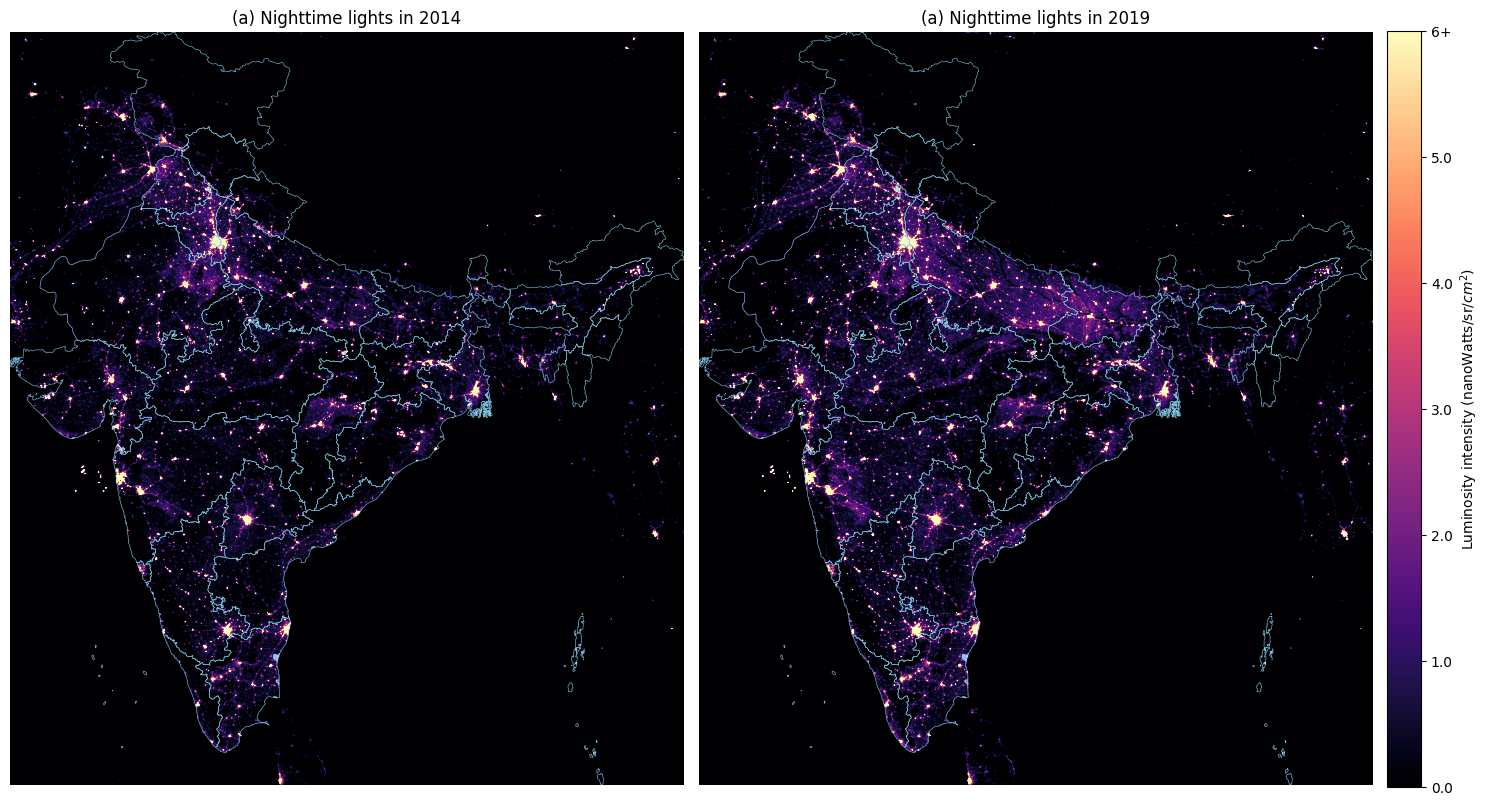

In [13]:
# @title CODE: Plot satellite images before and after

# Initialize the GridSpec for setting up the plot structure
RADIANCE_THRESHOLD = 6  # @param {type:"number"}

gs = GridSpec(1, 3, width_ratios=[2, 2, 0.1])

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(gs[0])

first_year_plot = ax1.imshow(
    raster_file_clipped_first,
    extent=polygons_files_bbox[[0, 2, 1, 3]],
    vmin=0,
    vmax=RADIANCE_THRESHOLD,
    cmap="magma",
)
polygons_files.boundary.plot(ax=ax1, color="skyblue", linewidth=0.4)
ax1.set_title(f"(a) Nighttime lights in {START_YEAR}")
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1])

last_year_plot = ax2.imshow(
    raster_file_clipped_last,
    extent=polygons_files_bbox[[0, 2, 1, 3]],
    vmin=0,
    vmax=RADIANCE_THRESHOLD,
    cmap="magma",
)
polygons_files.boundary.plot(ax=ax2, color="skyblue", linewidth=0.4)
ax2.set_title(f"(a) Nighttime lights in {END_YEAR}")
ax2.set_axis_off()

cax2 = fig.add_subplot(gs[2])
# Add colorbar
cbar = fig.colorbar(
    first_year_plot, cax=cax2, label="Luminosity intensity (nanoWatts/sr/$cm^2$)"
)

# Set ticks and labels with the last one as f"{RADIANCE_THRESHOLD}+"
cbar.set_ticklabels(
    [f"{val}" for val in cbar.get_ticks()[:-1]] + [f"{RADIANCE_THRESHOLD}+"]
)

plt.tight_layout()
plt.savefig("figures/NTL.png", dpi=300, bbox_inches="tight")
plt.show()

**Figure 1**: Raster images of nighttime lights and administrative boundaries of India: Initial
vs final year

### 4.2 Computing zonal statistics

To make a meaningful comparison between NTL and subnational GDP, it is crucial to ensure that both datasets are measured at the same geographic scale. As GDP is available at the state level, we need to aggregate the NTL values accordingly. This can be achieved through zonal statistics, where we sum the amount of light within the boundaries of each state, resulting in a state-level dataset of regional luminosity.

To accomplish this aggregation, we initially load the NTL images for each year of interest. Next, we define a mask function that can filter all points outside the polygon in the raster file. Lastly, we apply the mask function to each polygon in the vector file, resulting in the summation that generates state-level luminosity for each year. More details about this implementation are provided in Appendix A. Although missing values are not a problem in our state-level dataset, they are more prone to occur when geographical units are small, largely rural, or sparsely populated.

In [14]:
# @title CODE: Define dataset to store results

gdf_NTL = polygons_files.copy()

In [15]:
# @title CODE: Compute zonal statistics

# Choose an operator for aggregation. In this notebook, the operator, AGGREGATE_OPERATOR, has been set to np.ma.sum.
# Other operators can be chosen, for example, np.ma.mean and np.ma.median will compute the mean and median respectively.
# The list of operators can be found here: https://numpy.org/doc/stable/reference/routines.ma.html
AGGREGATE_OPERATOR = np.ma.sum


# Define the clean_mask function outside the loop
def geom_mask(geom, dataset, crop=True, all_touched=True):
    masked, mask_transform = mask(
        dataset=dataset, shapes=(geom,), crop=crop, all_touched=all_touched
    )
    return masked


# A loop runs from the start year to the end year that computes the aggregate nighttime lights radiance for each state
for year in range(START_YEAR, END_YEAR + 1):
    # The raster file of the given year is loaded
    raster_file = load_raster(year)
    # The mask is applied, and then a summation is performed for computing the aggregate radiance.
    statewise_agg_ntl = polygons_files.geometry.apply(
        geom_mask, dataset=raster_file
    ).apply(AGGREGATE_OPERATOR)

    # The state-wise aggregate radiance of the year is stored in the data frame that was initialized earlier.
    gdf_NTL[str(year)] = statewise_agg_ntl

As the final step in the aggregation process, we obtain a `GeoDataFrame` in which each column represents the total sum of nighttime lights for each state across all years.

In [16]:
# @title CODE: Show zonal statistics results
gdf_NTL

,id,region,geometry,...,2017,2018,2019
0,1,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84861 7.24051, 93.80986 7.2...",...,2.9501e+03,3.3096e+03,3.4267e+03
1,3,Arunachal Pradesh,"MULTIPOLYGON (((95.23730 26.67984, 95.25969 26...",...,8.4099e+03,8.1394e+03,1.1512e+04
2,4,Assam,"MULTIPOLYGON (((95.19587 27.03716, 95.21414 27...",...,1.7227e+05,1.6381e+05,1.6768e+05
3,5,Bihar,"MULTIPOLYGON (((88.11223 26.53886, 88.09970 26...",...,4.4029e+05,5.3907e+05,6.2007e+05
4,6,Chandigarth,"MULTIPOLYGON (((76.84147 30.75996, 76.82527 30...",...,1.3767e+04,1.3751e+04,1.4122e+04
...,...,...,...,...,...,...,...
31,34,Uttar Pradesh,"MULTIPOLYGON (((79.39956 25.03069, 79.42431 25...",...,1.7540e+06,1.6793e+06,1.6754e+06
32,35,Uttarakhand,"MULTIPOLYGON (((80.07035 28.82923, 80.06361 28...",...,1.1927e+05,1.1099e+05,1.1275e+05
33,36,West Bengal,"MULTIPOLYGON (((88.49771 21.59976, 88.48611 21...",...,5.2243e+05,5.1658e+05,5.0112e+05
34,26,Odisha,"MULTIPOLYGON (((86.72789 22.21930, 86.68731 22...",...,3.6816e+05,3.7614e+05,3.6962e+05


<center> <b>Table 2:</b> Regional nighttime light values over time </center>

Next, we create a dataset of summary statistics for state-level nighttime lights by year.



In [17]:
# @title CODE: Show descriptive statistics by year

# The summary statistics of aggregate nighttime lights is produced for each year
gdf_NTL_summary = gdf_NTL.drop(["geometry", "id"], axis=1).describe().round(2)
gdf_NTL_summary

,2014,2015,2016,2017,2018,2019
count,3.6000e+01,36.00,3.6000e+01,3.6000e+01,3.6000e+01,3.6000e+01
mean,2.4044e+05,254096.11,2.5798e+05,3.0650e+05,3.1984e+05,3.3252e+05
std,2.7458e+05,284386.91,3.0769e+05,3.8398e+05,3.9127e+05,4.0660e+05
min,8.7400e+01,92.03,7.3820e+01,1.0994e+02,1.2033e+02,1.3022e+02
25%,1.1262e+04,11442.40,1.2232e+04,1.3355e+04,1.3229e+04,1.3640e+04
50%,1.4720e+05,170297.48,1.4774e+05,1.6523e+05,1.6215e+05,1.6067e+05
75%,4.1105e+05,378816.13,3.6443e+05,4.4962e+05,5.1787e+05,5.0807e+05
max,1.0247e+06,993814.31,1.2645e+06,1.7540e+06,1.6793e+06,1.6754e+06


<center> <b>Table 3:</b> Descriptive statistics of regional nighttime lights </center>

Next, we export the results as a geojson file, ready for analysis in standard geospatial applications and data science languages.

In [18]:
# @title CODE: Save tabular NTL dataset

gdf_NTL.to_file("data/vector/gdf_NTL.geojson", driver="GeoJSON")

### 4.3 Creating panel-data structures

Having successfully aggregated the nighttime lights data to the state level to align with the resolution of the subnational GDP data, we can now create panel-data structures for both datasets and merge them into a single dataset. We first retrieve the state-level NTL and GDP data. Both datasets are transformed into long-form panel structures. Thus, they are ready to be merged into a single dataset.

In [19]:
# @title CODE: Read saved NTL data

df_NTL = gpd.read_file("data/vector/gdf_NTL.geojson").drop("geometry", axis=1)

In [20]:
# @title CODE: Reshape NTL data into long-form panel data

df2_NTL = pd.melt(
    df_NTL,
    id_vars=["id", "region"],
    value_vars=[str(x) for x in range(START_YEAR, END_YEAR + 1)],
)
df2_NTL.columns = ["id", "region", "year", "NTL"]

In [21]:
# @title CODE: Reshape GDP data into long-form panel data

df2_GDP = pd.melt(
    df_GDP,
    id_vars=["id", "region"],
    value_vars=[str(x) for x in range(START_YEAR, END_YEAR + 1)],
)
df2_GDP.columns = ["id", "region", "year", "GDP"]

In [22]:
# @title CODE: Merge NTL and GDP datasets

df = pd.merge(df2_GDP, df2_NTL, on=["id", "region", "year"], how="inner")

Two new columns are added on the basis of the natural logarithmic values of NTL and GDP. To avoid calculation problems with the logarithmic values, we add a constant of 0.01.

In [23]:
# @title CODE: Add offset to compute log values

LOG_OFFSET = 0.01
df["lnNTL"] = np.log(LOG_OFFSET + df["NTL"])
df["lnGDP"] = np.log(LOG_OFFSET + df["GDP"])

Finally, we have a long-form panel-data structure of state-level NTL and GDP.

In [24]:
# @title CODE: Show long-form dataset

df

,id,region,year,GDP,NTL,lnNTL,lnGDP
0,1,Andaman and Nicobar Islands,2014,3.9615e+06,2.9365e+03,7.9850,15.1921
1,2,Andhra Pradesh,2014,4.3554e+08,3.0310e+05,12.6218,19.8921
2,3,Arunachal Pradesh,2014,8.5731e+06,7.2797e+03,8.8928,15.9641
3,4,Assam,2014,1.1240e+08,1.5431e+05,11.9467,18.5376
4,5,Bihar,2014,2.6511e+08,2.0255e+05,12.2187,19.3957
...,...,...,...,...,...,...,...
211,32,Telangana,2019,3.6413e+08,5.2893e+05,13.1786,19.7130
212,33,Tripura,2019,1.9736e+07,3.4391e+04,10.4456,16.7980
213,34,Uttar Pradesh,2019,9.9160e+08,1.6754e+06,14.3316,20.7148
214,35,Uttarakhand,2019,9.9485e+07,1.1275e+05,11.6330,18.4155


**Table 4:** Regional GDP and nighttime lights: Long-form panel dataset

In [25]:
# @title CODE: Save long-form dataset

df.to_csv("data/tabular/df_NTL_GDP_lnNTL_lnGDP.csv", index=False)

For other kinds of analysis, this panel-data structure is reshaped into its wide form. This new dataset contains the following columns:
id, region name, geometry, and logarithm values of NTL for each year

In [26]:
# @title CODE: Generate a wide-form dataset for (ln) NTL

# Pivot panel data from long form to wide form
df_lnNTL = df.pivot_table(
    index=["id", "region"], columns="year", values="lnNTL"
).reset_index(drop=False)
# Make sure the column names are strings
df_lnNTL.columns = df_lnNTL.columns.astype(str)

In [27]:
# @title CODE: Merge (ln) NTL dataset with map file

gdf_lnNTL = pd.merge(
    polygons_files,
    df_lnNTL,
    left_on=["id", "region"],
    right_on=["id", "region"],
    how="inner",
)
gdf_lnNTL

,id,region,geometry,...,2017,2018,2019
0,1,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84861 7.24051, 93.80986 7.2...",...,7.9896,8.1046,8.1394
1,3,Arunachal Pradesh,"MULTIPOLYGON (((95.23730 26.67984, 95.25969 26...",...,9.0372,9.0045,9.3512
2,4,Assam,"MULTIPOLYGON (((95.19587 27.03716, 95.21414 27...",...,12.0568,12.0064,12.0298
3,5,Bihar,"MULTIPOLYGON (((88.11223 26.53886, 88.09970 26...",...,12.9952,13.1976,13.3376
4,6,Chandigarth,"MULTIPOLYGON (((76.84147 30.75996, 76.82527 30...",...,9.5301,9.5289,9.5555
...,...,...,...,...,...,...,...
31,34,Uttar Pradesh,"MULTIPOLYGON (((79.39956 25.03069, 79.42431 25...",...,14.3774,14.3339,14.3316
32,35,Uttarakhand,"MULTIPOLYGON (((80.07035 28.82923, 80.06361 28...",...,11.6891,11.6172,11.6330
33,36,West Bengal,"MULTIPOLYGON (((88.49771 21.59976, 88.48611 21...",...,13.1662,13.1550,13.1246
34,26,Odisha,"MULTIPOLYGON (((86.72789 22.21930, 86.68731 22...",...,12.8163,12.8377,12.8202


**Table 5:** Regional (ln) NTL: Wide-form panel dataset

The resulting geospatial dataset is saved and will be used in various visualizations in the next section.

In [28]:
# @title CODE: Save geospatial dataset of (ln) NTL

gdf_lnNTL.to_file("data/vector/gdf_lnNTL.geojson", driver="GeoJSON")

Similarly, we construct a wide-form panel dataset for the natural logarithmic values of GDP.

In [29]:
# @title CODE: Generate wide-form dataset for (ln) GDP

# Pivot panel data from long form to wide form
df_lnGDP = df.pivot_table(
    index=["id", "region"], columns="year", values="lnGDP"
).reset_index(drop=False)
# Make sure the column names are strings
df_lnGDP.columns = df_lnGDP.columns.astype(str)

In [30]:
# @title CODE: Merge (ln) GDP dataset with map file

gdf_lnGDP = pd.merge(
    polygons_files,
    df_lnGDP,
    left_on=["id", "region"],
    right_on=["id", "region"],
    how="inner",
)
gdf_lnGDP

,id,region,geometry,...,2017,2018,2019
0,1,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84861 7.24051, 93.80986 7.2...",...,15.2835,15.3464,15.3980
1,3,Arunachal Pradesh,"MULTIPOLYGON (((95.23730 26.67984, 95.25969 26...",...,15.8766,15.9368,15.9862
2,4,Assam,"MULTIPOLYGON (((95.19587 27.03716, 95.21414 27...",...,18.6488,18.7058,18.7527
3,5,Bihar,"MULTIPOLYGON (((88.11223 26.53886, 88.09970 26...",...,19.6709,19.7264,19.7721
4,6,Chandigarth,"MULTIPOLYGON (((76.84147 30.75996, 76.82527 30...",...,16.6551,16.7201,16.7734
...,...,...,...,...,...,...,...
31,34,Uttar Pradesh,"MULTIPOLYGON (((79.39956 25.03069, 79.42431 25...",...,20.6101,20.6675,20.7148
32,35,Uttarakhand,"MULTIPOLYGON (((80.07035 28.82923, 80.06361 28...",...,18.3042,18.3653,18.4155
33,36,West Bengal,"MULTIPOLYGON (((88.49771 21.59976, 88.48611 21...",...,20.0276,20.0859,20.1339
34,26,Odisha,"MULTIPOLYGON (((86.72789 22.21930, 86.68731 22...",...,18.9935,19.0504,19.0973


<center> <b>Table 6:</b> Regional (ln) GDP: Wide-form panel dataset</center>

In [31]:
# @title CODE: Save geospatial dataset of (ln) NTL

gdf_lnGDP.to_file("data/vector/gdf_lnGDP.geojson", driver="GeoJSON")

##  5 Analyzing nighttime lights and GDP

### 5.1 Exploring space-time patterns

#### 5.1.1 Choropleth maps

Based on the previously constructed panel-data structures (`gdf_lnNTL` and `gdf_lnGDP`), we can easily visualize comparative choropleth maps for (log) nighttime lights and GDP. In particular, the `explore()` function of the Geopandas package allows us to easily construct interactive maps. In addition, consistent with the `Mapclassify` package, multiple classification schemes are available. For example, in Figures 2 and 3, we use a boxplot classification to understand the spatial distribution of NTL and GDP in 2014. We can easily identify where the regions below and above the median are located.  We can also identify and compare potential spatial clusters in both distributions.

In [32]:
# @title CODE: Plot interactive choroplet map for ln NTL

gdf_lnNTL.explore(
    column=str(START_YEAR),
    tooltip=["region", str(START_YEAR)],
    scheme="BoxPlot",  # Quantiles, EqualInterval, BoxPlot, FisherJenks
    cmap="magma",  # hot, cividis, plasma, magma, inferno, coolwarm, viridis
    legend=True,
    tiles="CartoDB dark_matter",  # CartoDB dark_matter OpenStreetMap, Stamen Terrain, Stamen Toner, Stamen Watercolor, CartoDB positron, CartoDB dark_mat,
    style_kwds=dict(color="darkgrey", weight=0.8),
    legend_kwds=dict(colorbar=False),
)

<center><b>Figure 2:</b> Distribution of (log) NTL in 2014</center>

In [33]:
# @title CODE: Plot interactive choroplet map for ln GDP

gdf_lnGDP.explore(
    column=str(END_YEAR),
    tooltip=["region", str(END_YEAR)],
    scheme="BoxPlot",  # Quantiles, EqualInterval, BoxPlot, FisherJenks
    cmap="magma",  # hot, cividis, plasma, magma, inferno, coolwarm, viridis
    legend=True,
    tiles="CartoDB dark_matter",  # CartoDB dark_matter OpenStreetMap, Stamen Terrain, Stamen Toner, Stamen Watercolor, CartoDB positron, CartoDB dark_mat,
    style_kwds=dict(color="darkgrey", weight=0.8),
    legend_kwds=dict(colorbar=False),
)

<center><b>Figure 3:</b> Distribution of (log) GDP in 2014</center>

Static choropleth maps can also be produced, allowing them to be included in non-HTML reports. In Figures 4 and 5, we show how the spatial distributions of NTL and GDP have changed over time. For that purpose, we keep the classification of the initial year constant (except for the minimum and maximum values). Based on these maps, we can observe inter-quantile mobility over time.

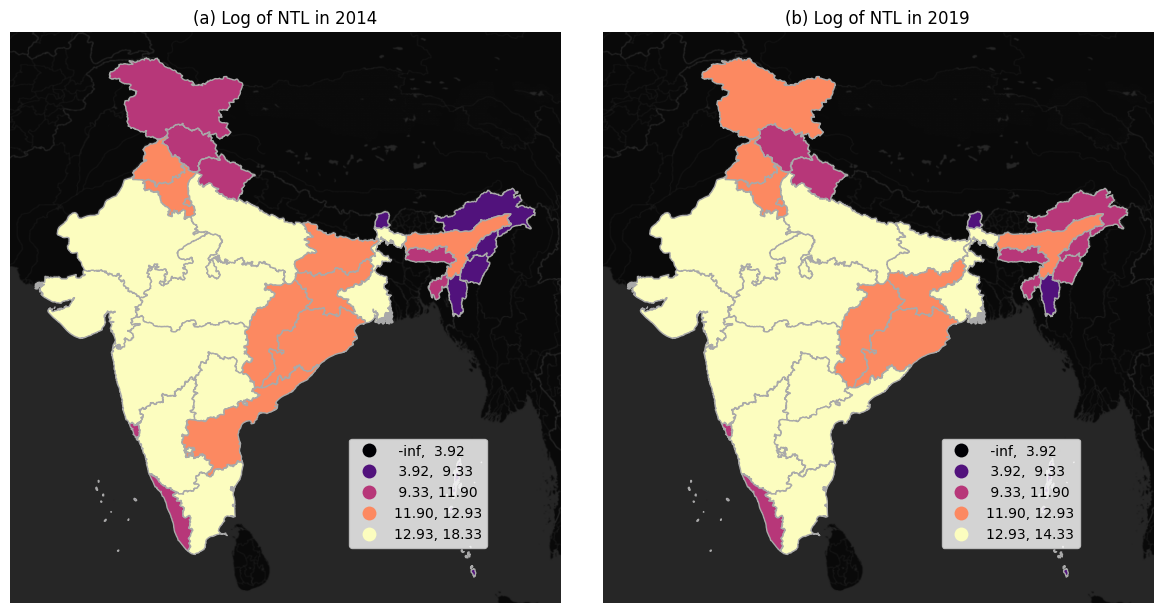

In [34]:
# @title CODE: Plot static map of (log) NTL for the initial and final year

# A figure is initialized
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# The plot of the start year is added
gdf_lnNTL.plot(
    column=str(START_YEAR),
    scheme="BoxPlot",
    cmap="magma",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[0],
    legend_kwds={"bbox_to_anchor": (0.88, 0.30)},
)
cx.add_basemap(
    ax=axes[0],
    crs=gdf_lnNTL.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
    attribution=False,
)

# The plot of the end year is added.
gdf_lnNTL.plot(
    column=str(END_YEAR),
    scheme="user_defined",
    classification_kwds={"bins": [3.92, 9.33, 11.90, 12.93]},
    cmap="magma",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[1],
    legend_kwds={"bbox_to_anchor": (0.88, 0.30)},
)
cx.add_basemap(
    ax=axes[1],
    crs=gdf_lnNTL.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
    attribution=False,
)

plt.tight_layout()
axes[0].axis("off")
axes[1].axis("off")
axes[0].set_title("(a) Log of NTL in " + str(START_YEAR))
axes[1].set_title("(b) Log of NTL in " + str(END_YEAR))

plt.savefig("figures/fig_map_lnNTL.png", dpi=300, bbox_inches="tight")
plt.show()

<center><b>Figure 4:</b> Distribution of (log) nighttime lights: 2014 vs 2019</center>

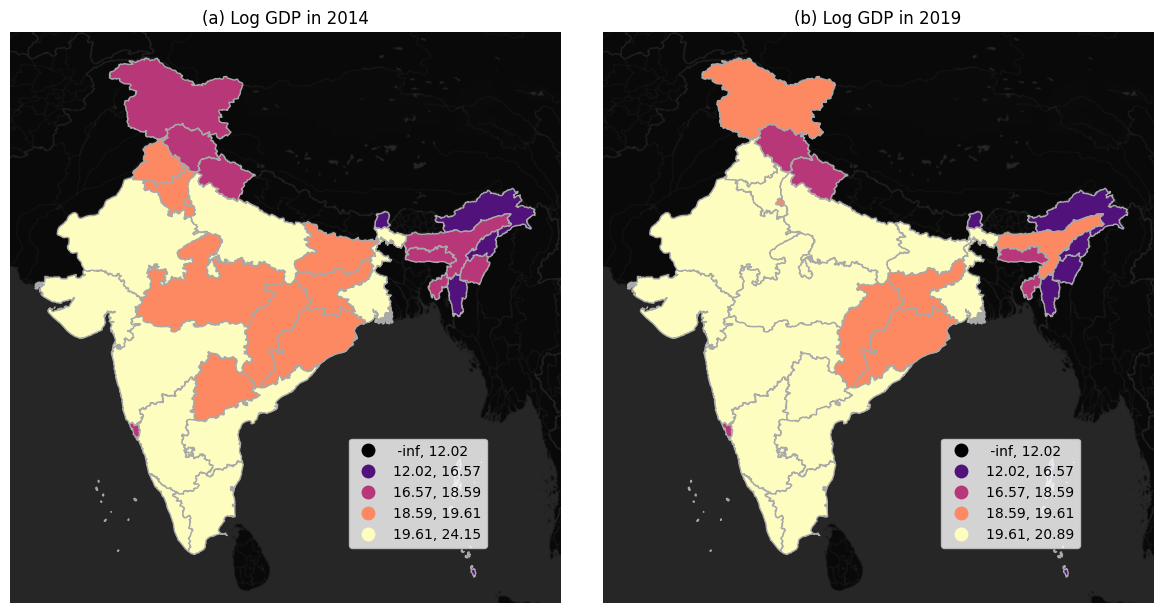

In [35]:
#@title CODE: Plot static map of (log) GDP for the initial and final year

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# plot for the start year is added.
gdf_lnGDP.plot(
    column=str(START_YEAR),
    scheme="BoxPlot",
    cmap="magma",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[0],
    legend_kwds={"bbox_to_anchor": (0.88, 0.30)},
)
cx.add_basemap(
    ax=axes[0],
    crs=gdf_lnGDP.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
    attribution=False,
)

# plot for the end year is added.
gdf_lnGDP.plot(
    column=str(END_YEAR),
    scheme="user_defined",
    classification_kwds={"bins": [12.02, 16.57, 18.59, 19.61]},
    cmap="magma",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[1],
    legend_kwds={"bbox_to_anchor": (0.88, 0.30)},
)
cx.add_basemap(
    ax=axes[1],
    crs=gdf_lnGDP.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
    attribution=False,
)

plt.tight_layout()
axes[0].axis("off")
axes[1].axis("off")
axes[0].set_title("(a) Log GDP in " + str(START_YEAR))
axes[1].set_title("(b) Log GDP in " + str(END_YEAR))
plt.savefig("figures/fig_map_lnGDP.png", dpi=300, bbox_inches="tight")
plt.show()

#### 5.1.2 Regional time series

In this section, we study the temporal evolution of NTL for each region. As we also have the time series of GDP, we can compare their trends and have a first visual validation of the usefulness of NTL for predicting economic activity over time. The plotting library `Plotly Express` is particularly useful for interactively exploring time series when the dataset is organized as a long-form dataframe. In the code below, we use the previously constructed long-form dataframe (`df`), which contains both NTL and GDP data. After indicating the `x` and `y` variables, we only need to use the argument color to identify the regions. After generating the Plotly object, we use the `write_image()` method to save the results as a static image. To generate a similar graph for GDP, we only need to change one argument: `y = "lnGDP".`

In [36]:
# @title CODE: Plot regional time series of (ln) NTL

fig_ts_lnNTL = px.line(df, x="year", y="lnNTL", color="region")
fig_ts_lnNTL.show(renderer="colab") # Change renderer to "iframe" when running the notebook locally

<center> <b>Figure 6:</b> Evolution of (log) nighttime lights in each region </center>

In [37]:
# @title CODE: Save plotly figure as PNG file

fig_ts_lnNTL.write_image("figures/fig_ts_lnNTL.png")

In [38]:
# @title CODE: Plot regional time series of (ln) GDP

fig_ts_lnGDP = px.line(df, x="year", y="lnGDP", color="region")
fig_ts_lnGDP.show()

<center> <b>Figure 7:</b>Evolution of (log) GDP in each region </center>

In [39]:
# @title CODE: Save plotly figure as PNG file

fig_ts_lnGDP.write_image("figures/fig_ts_lnGDP.png")

Figures 6 and 7 show the time series of NTL and GDP, respectively, on a regional basis. A preliminary visual examination reveals the similarities and differences between these two variables for each region. In certain regions, the NTL trends exhibit larger fluctuations than those of GDP. Due to the possibility of measurement errors in earth observation data, large fluctuations may require further attention and data processing. For example, to focus the the analysis on long-run trends, one may consider using time-series filters to remove short-term fluctuations. Overall, this preliminary visual assessment can provide useful information on the temporal dynamics of economic activity and can be performed effortlessly using the Plotly Express library.

#### 5.1.3 Scatter plot with linear fit

To study the relationship between nighttime lights (NTL) and GDP, we use the interactive scatterplot from the `Plotly Express` library. In addition to the basic arguments of a scatter plot (data frame, the x-axis, and the y-axis), the function `px.scatter()` allows us to specify other arguments such as hover on name, text on selected observations, animation frame, and trend line. The animation frame and the trend line options are particularly informative when analyzing longitudinal (panel) data. When activated, we can fit a regression line for each time period. Also, when hovering on the regression line, we can easily obtain regression statistics such as R-Squared, regression coefficients, and predicted values.

In [40]:
# @title CODE: Plot the NTL-GDP relationship

df_selected_year = df[df["year"].astype(int) == START_YEAR]

N_LABELLED_REGIONS = 6

quantiles = np.linspace(0, 1, N_LABELLED_REGIONS + 1)
quantiles = df_selected_year["lnNTL"].quantile(quantiles)


# Function to find the closest value to a given quantile
def find_closest_value(quantile_val):
    return df_selected_year.iloc[
        (df_selected_year["lnNTL"] - quantile_val).abs().argsort()[:1]
    ]


# Find closest regions to the quantiles
selected_regions = pd.concat([find_closest_value(quantile) for quantile in quantiles])

region_text = selected_regions["region"]

# Create a new column 'selected_region' in df based on the condition
df["selected_regions"] = df["region"].where(df["region"].isin(region_text), pd.NA)

fig_sc_lnNTL_lnGDP = px.scatter(
    data_frame=df,
    x="lnNTL",
    y="lnGDP",
    range_x=[2, 16.5],
    range_y=[12, 22],
    hover_name="region",
    text="selected_regions",
    animation_frame="year",
    trendline="ols",
)

fig_sc_lnNTL_lnGDP.update_traces(textposition="top center")
fig_sc_lnNTL_lnGDP.show()

<center> <b>Figure 8:</b> Relationship between nighttime lights and GDP </center>

In [41]:
# @title CODE: Save plotly figure as PNG

fig_sc_lnNTL_lnGDP.write_image("figures/fig_sc_lnNTL_lnGDP.png")

Figure 8 shows a strong linear relationship between (log) NTL and GDP. In the year 2014, NTL explained 89% of the regional variation in GDP. Over time, the predictive power of NTL has remained stable around 90%. The regression coefficient of NTL in 2014 was 0.82, indicating that a 10% increase in NTL is associated with an 8.2% increase in GDP. Over time, this coefficient has slightly increased. By 2019, a 10% increase in NTL is associated with an 8.5% increase in GDP. Taken together, these results indicate that, on a year-by-year basis, nightlights are a useful proxy for economic activity.

### 5.2 Predicting GDP with nightlights

To evaluate the usefulness of nighttime lights (NTL) for predicting economic activity
(GDP), let us consider the following panel-data model:

$\log (GDP)_{it} =  \beta \log (NTL)_{it} + \mu_i + \varphi_t + \varepsilon_{it}, $ (1)

where $i$ indexes the regional economies,  $t$ indexes the years, $\mu_i$ is a region-specific  effect,  $\varphi_t$ is a year-specific effect, and $\varepsilon_{it}$ is random disturbance. Region-specific effects, $\mu_i$, capture the influence of unobserved factors that are constant over time. Time specific effects, $\varphi_t$, capture the influence of unobserved factors that change over time but are common between regions. The most important parameter in this model is $\beta$, which summarizes the relation between GDP and nighttime lights (NTL). Given the logarithmic specification of the model, the parameter $\beta$ indicates by what percentage GDP changes when the NTL changes by 1\%. However, the specification of Equation 1 does not imply that NTL causes GDP. The parameter $\beta$ only has a predictive interpretation.

There are multiple ways to estimate the parameter $\beta$. Let us consider the following three basic cases:

$\log (GDP)_{it} =  \beta_{\text{Pooled}} \log (NTL)_{it} + \mu + \varepsilon_{it}, $ (2)

$\overline{\log (GDP)_{i}}  =  \beta_{\text{Between}} \overline{\log (NTL)_{i}} + \mu_i + \overline{\varepsilon_{i}},
$ (3)

$\log (GDP)_{it} - \overline{\log (GDP)_{i}} =  \beta_{\text{Within}} \left[\log (NTL)_{it} - \overline{\log (NTL)_{i}} \right] + \varphi_t + \varepsilon_{it} - \overline{\varepsilon_{i}}, $ (4)


The simplest estimation of $\beta$ is based on the so-called "pooled" estimator, $\beta_{\text{Pooled}}$. In this setting (Equation 2), time-specific effects are set to zero and all regions share a common intercept $\mu$. The parameter $\beta_{\text{Pooled}}$ indicates that--for all regional observations--an increase in NTL of 1\% leads to a $\beta_{\text{Pooled}}$ \% expected increase in GDP. This model implies that we can expect the same effect of NTL on GDP if there is a 1\% difference between regions or a 1\% increase within a region. Thus, an important limitation of Equation 2 is that we cannot disentangle the usefulness of NTL data to predict cross-sectional differences or time series changes in GDP.

The "between" and "within" estimators are commonly used to evaluate the usefulness of NTL data for predicting GDP differences and changes within regions, respectively (Gibson, Boe-Gibson, 2021; Zhang, Gibson, 2022). In Equation 3, the (log) values of GDP and NTL are time averaged, and the model is estimated using standard cross-sectional methods. The parameter $\beta_{\text{Between}}$ indicates the effect on GDP when NTL changes between regions. In Equation 4, Equation 3 is subtracted from Equation 1, and, by doing so, unobservable region-specific effects ($\mu_i$) are removed from the estimation.
The parameter $\beta_{\text{Within}}$ indicates the effect on GDP when NTL changes within regions.

The `Linearmodels` package allows us to estimate a variety of panel-data models. With this package, we can easily compare the previously described estimation approaches. Consistent with the previous literature (Gibson, Boe-Gibson, 2021; Zhang, Gibson, 2022), the results of Table 7 show that the predictive capabilities of NTL vary greatly depending on the type of data structure. The results of the “between estimator” are encouraging in terms of statistical significance and predictive power. NTL data predict about 90% of the variation in GDP data. The regression coefficient indicates that a 10% increase in NTL is associated with an 8.5% increase in GDP. In contrast, the results of the “within estimator” do not show a statistically significant relationship between NTL and GDP. Based on these results, nightlights perform much better in predicting cross-sectional differences than changes over time.

In [42]:
# @title CODE: Read panel dataset

df_panel = pd.read_csv("data/tabular/df_NTL_GDP_lnNTL_lnGDP.csv").set_index(
    ["region", "year"]
)

In [43]:
# @title CODE: Conduct panel data regressions

table = {
    "(1) Pooled": PooledOLS.from_formula(
        formula="lnGDP ~ 1 + lnNTL", data=df_panel
    ).fit(cov_type="clustered"),
    "(2) Between": BetweenOLS.from_formula(
        formula="lnGDP ~ 1 + lnNTL", data=df_panel
    ).fit(cov_type="clustered"),
    "(3) Within": PanelOLS.from_formula(
        formula="lnGDP ~ 1 + lnNTL + EntityEffects + TimeEffects", data=df_panel
    ).fit(cov_type="clustered"),
}

In [44]:
# @title CODE: Show comparative regression table

compare(table).summary

,(1) Pooled,(2) Between,(3) Within
Dep. Variable,lnGDP,lnGDP,lnGDP
Estimator,PooledOLS,BetweenOLS,PanelOLS
No. Observations,216,36,216
Cov. Est.,Clustered,Clustered,Clustered
R-squared,0.8981,0.9036,0.0002
R-Squared (Within),-0.2222,-0.2256,-0.0119
R-Squared (Between),0.9036,0.9036,-0.0315
R-Squared (Overall),0.8981,0.8980,-0.0314
F-statistic,1885.1,318.67,0.0381
P-value (F-stat),0.0000,0.0000,0.8454



<center> <b>Table 7:</b> The relationship between NTL and GDP </center>

### 5.3 Comparing regional inequality dynamics: GDP vs nightlights

Inter-regional inequality is commonly identified as an important driver of socioeconomic instabilities, civil unrest, and political polarization (Ezcurra, 2019; Rodriguez-Pose, 2018). As a proxy of economic activity, NTL data are also used to understand regional inequality and its dynamics (Lessmann, Seidel, 2017; Mendez, Santos-Marquez, 2021; Mveyange, 2018). In this section, we compare the evolution of regional inequality through the lens of GDP and NTL. For this purpose, we use two well-known inequality indicators: the Gini index and the Theil index.

The `inequality` package allows us to estimate both the Gini and Theil indexes. As we want to measure regional inequality for each year, we first need to define a function that computes regional inequality for each year within our dataset. Before applying these functions, we need to define a string-type vector that contains the time horizon of the analysis. The following code accomplishes these tasks.

In [45]:
# @title CODE: Define function: Gini index by column

def gini_by_col(column):
    return inequality.gini.Gini(column.values).g

In [46]:
# @title CODE: Define function: Theil index by column

def theil_by_col(column):
    return inequality.theil.Theil(column.values).T

In [47]:
# @title CODE: Define time index

years = np.arange(START_YEAR, END_YEAR + 1).astype(str)

Next, we apply these functions to the wide-form datasets: `gdf_lnGDP` and `gdf_lnNTL`. Four new datasets are created: `gini_lnGDP`, `gini_lnNTL`, `theil_lnGDP`, `theil_lnNTL`. The content and layout structure of these data can easily allow for further data processing or visualization.

In [48]:
# @title CODE: Calculate Gini index by column

gini_lnGDP = gdf_lnGDP[years].apply(gini_by_col, axis=0).to_frame("Gini_lnGDP")
gini_lnNTL = gdf_lnNTL[years].apply(gini_by_col, axis=0).to_frame("Gini_lnNTL")

In [49]:
# @title CODE: Calculate Theil index by column

theil_lnGDP = gdf_lnGDP[years].apply(theil_by_col, axis=0).to_frame("Theil_lnGDP")
theil_lnNTL = gdf_lnNTL[years].apply(theil_by_col, axis=0).to_frame("Theil_lnNTL")

Figures 9 and 10 provide a comparative visualization of the evolution of regional inequality, both in terms of nightlight luminosity (NTL) and economic activity (GDP). This comparative analysis indicates that, when measured against the regional disparities in GDP, the luminosity patterns reveal a higher degree of regional inequality. Specifically, Figure 10 shows that the inequality in NTL was about 1.83 times higher than the inequality in GDP in 2014. By 2019, this inequality ratio has been reduced to just above 1.76 times. From the perspective of the Theil inequality index, Figures 11 and 12 also indicate that the regional inequality in luminosity is higher than the regional inequality in GDP.

Researchers should be careful when interpreting the differences between NTL and GDP. Both types of data are subject to measurement errors. In particular, in the context of developing countries, GDP data can suffer from incomplete coverage, price distortions, and political distortions. Even higher-quality nightlights can suffer from ephemeral lights, background noise, and other measurement errors. Therefore, understanding the magnitude of these errors is crucial in drawing conclusions about the disparities in regional economic activity.

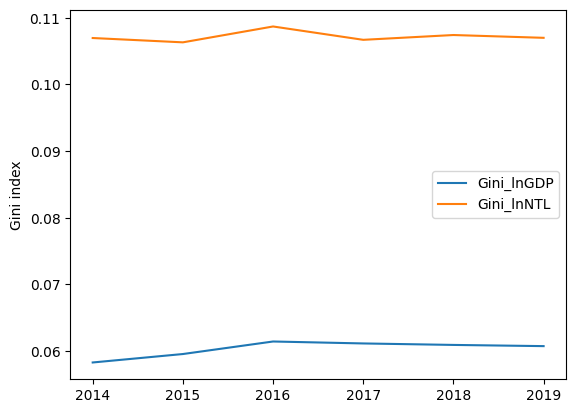

In [50]:
# @title CODE: Plot Gini index dynamics of (ln) GDP and NTL

df_gini = pd.merge(gini_lnGDP, gini_lnNTL, left_index=True, right_index=True)
df_gini.plot()
plt.ylabel("Gini index")
plt.savefig("figures/fig_ts_gini.png")

<center> <b>Figure 9:</b> Regional inequality dynamics of GDP and NTL based on the Gini index</center>

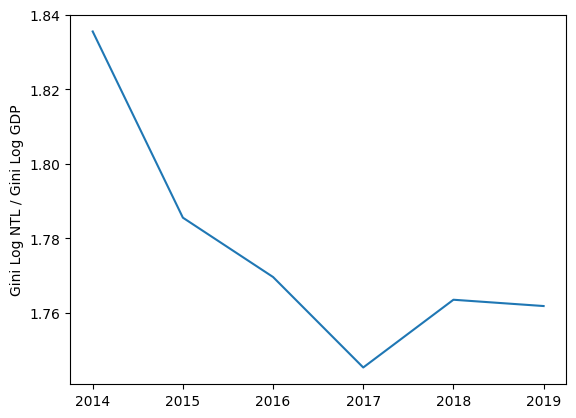

In [51]:
# @title CODE: Plot inequality ratio (NTL/GDP) based on the Gini index

df_gini["Gini_Ratio"] = df_gini["Gini_lnNTL"] / df_gini["Gini_lnGDP"]
df_gini["Gini_Ratio"].plot()
plt.ylabel("Gini Log NTL / Gini Log GDP")
plt.savefig("figures/fig_ts_giniRatio.png")

<center> <b>Figure 10:</b> Gini-based inequality ratio between NTL and GDP</center>

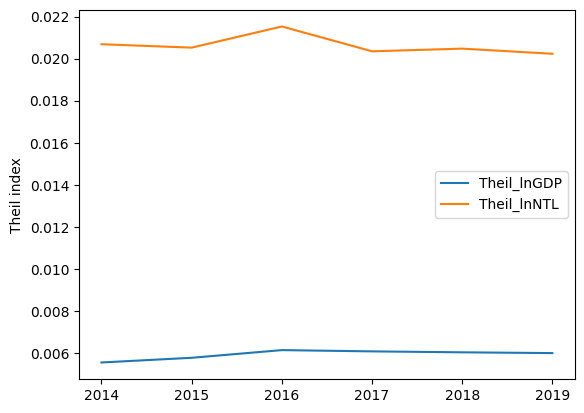

In [52]:
# @title CODE: Plot Theil index dynamics of (ln) GDP and NTL

df_theil = pd.merge(theil_lnGDP, theil_lnNTL, left_index=True, right_index=True)
df_theil.plot()
plt.ylabel("Theil index")
plt.savefig("figures/fig_ts_theil.png")

<center> <b>Figure 11:</b> Regional inequality dynamics of GDP and NTL based on the Theil index</center>

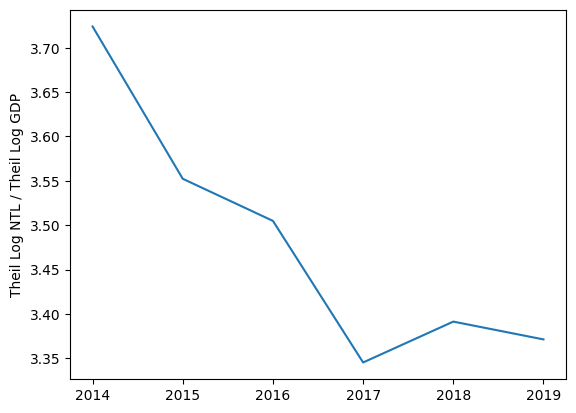

In [53]:
# @title CODE: Plot inequality ratio (NTL/GDP) based on the Gini index

df_theil["Theil_Ratio"] = df_theil["Theil_lnNTL"] / df_theil["Theil_lnGDP"]
df_theil["Theil_Ratio"].plot()
plt.ylabel("Theil Log NTL / Theil Log GDP")
plt.savefig("figures/fig_ts_theilRatio.png")

<center><b>Figure 12:</b> Theil-based inequality ratio between NTL and GDP</center>

## 6 Concluding remarks

The increasing availability of satellite nighttime lights can foster the monitoring of economic activity, especially in countries with limited official statistics. Luminosity at night is positively correlated with GDP and other economic measures across countries and subnational regions.  However, satellite images can still present challenges that affect their application. A careful researcher must be aware of the magnitude of noise and measurement errors inherent in this kind of data.

Measurement errors in NTL data can arise from multiple sources, including ephemeral lights, sensor calibration issues, blurring effects, thresholding, and angular variations in satellite detection. Despite these concerns, there is a rapidly expanding body of literature that offers improved data products and novel tools to use these images effectively. This notebook introduced some of those data and tools to encourage further exploration and discussion of the measurement of regional economic activity.

In this notebook, we presented a user-friendly approach for analyzing satellite NTL images in a cloud-based Python environment. When using these data, one needs to interactively explore space-time patterns, as NTL may require additional cleaning and processing. In particular, when using NTL data to predict economic activity, one must note the difference between cross-sectional and time-series predictions. NTL data has been shown to perform much better with the former. Another application worth exploring is the measurement of regional inequality dynamics. Using multiple inequality measures is recommended to confirm regional inequality trends.

## Links to the computational notebook

- Short link: https://bit.ly/project2022p
- Full link: https://colab.research.google.com/github/quarcs-lab/project2022p/blob/master/project2022p_notebook.ipynb
- Github repository: https://github.com/quarcs-lab/project2022p

## References


1. Abrahams, A., Oram, C., & Lozano-Gracia, N. (2018). Deblurring DMSP nighttime lights: A new method using Gaussian filters and frequencies of illumination. *Remote Sensing of Environment, 210*, 242-258. [https://doi.org/10.1016/j.rse.2018.03.018](https://doi.org/10.1016/j.rse.2018.03.018)

2. Alesina, A., Michalopoulos, S., & Papaioannou, E. (2016). Ethnic inequality. *Journal of Political Economy, 124*(2), 428-488. [https://doi.org/10.1086/685300](https://doi.org/10.1086/685300)

3. Bresenham, J. E. (1965). Algorithm for computer control of a digital plotter. *IBM Systems journal, 4*(1), 25-30. [https://doi.org/10.1147/sj.41.0025](https://doi.org/10.1147/sj.41.0025)

4. Chen, M., Fahrner, D., Arribas-Bel, D., & Rowe, F. (2020). A reproducible notebook to acquire, process and analyse satellite imagery: Exploring long-term urban changes. *Region, 7*(2), 15-46. [https://doi.org/10.18335/region.v7i2.295](https://doi.org/10.18335/region.v7i2.295)

5. Chen, X., & Nordhaus, W. D. (2011). Using luminosity data as a proxy for economic statistics. *Proceedings of the National Academy of Sciences, 108*(21), 8589-8594. [https://doi.org/10.1073/pnas.1017031108](https://doi.org/10.1073/pnas.1017031108)

6. Donaldson, D., & Storeygard, A. (2016). The view from above: Applications of satellite data in economics. *Journal of Economic Perspectives, 30*(4), 171-98. [https://doi.org/10.1257/jep.30.4.171](https://doi.org/10.1257/jep.30.4.171)

7. Elvidge, C. D., Zhizhin, M., Ghosh, T., Hsu, F.-C., & Taneja, J. (2021). Annual time series of global VIIRS nighttime lights derived from monthly averages: 2012 to 2019. *Remote Sensing, 13*(5), 922. [https://doi.org/10.3390/rs13050922](https://doi.org/10.3390/rs13050922)


8. Elvidge, C. D., Baugh, K., Zhizhin, M., Hsu, F. C., & Ghosh, T. (2017). VIIRS night-time lights. *International Journal of Remote Sensing, 38*(21), 5860-5879. [https://doi.org/10.1080/01431161.2017.1342050](https://doi.org/10.1080/01431161.2017.1342050)

9. Elvidge, C. D., Baugh, K. E., Zhizhin, M., & Hsu, F.-C. (2013). Why VIIRS data are superior to DMSP for mapping nighttime lights. *Proceedings of the Asia-Pacific Advanced Network, 35*, 62. [https://doi.org/10.7125/APAN.35.7](https://doi.org/10.7125/APAN.35.7)

10. Ezcurra, R. (2019). Interregional inequality and civil conflict: Are spatial disparities a threat to stability and peace? *Defence and Peace Economics, 30*(7), 759-782. [https://doi.org/10.1080/10242694.2018.1446621](https://doi.org/10.1080/10242694.2018.1446621)

11. Falchetta, G. (2023). *blackmaRble: retrieve, wrangle and plot VIIRS Black Marble nighttimelight data in R*. [GitHub repository](https://github.com/giacfalk/blackmaRble)

12. Gibson, J., & Boe-Gibson, G. (2021). Which night lights data should we use in economics, and where? *Journal of Development Economics, 149*, 102602. [https://doi.org/10.1016/j.jdeveco.2020.102602](https://doi.org/10.1016/j.jdeveco.2020.102602)

13. Gibson, J. (2021). Better night lights data, for longer. *Oxford Bulletin of Economics and Statistics, 83*(3), 770-791. [https://doi.org/10.1111/obes.12417](https://doi.org/10.1111/obes.12417)

14. Gibson, J., Olivia, S., & Boe-Gibson, G. (2020). Night lights in economics: Sources and uses. *Journal of Economic Surveys, 34*(5), 955-980. [https://doi.org/10.1111/joes.12387](https://doi.org/10.1111/joes.12387)

15. Henderson, J. V., Storeygard, A., & Weil, D. N. (2012). Measuring economic growth from outer space. *American Economic Review, 102*(2), 994-1028. [https://doi.org/10.1257/aer.102.2.994](https://doi.org/10.1257/aer.102.2.994)

16. Kim, B., Gibson, J., & Boe-Gibson, G. (2024). Measurement errors in popular night lights data may bias estimated impacts of economic sanctions: Evidence from closing the Kaesong Industrial Zone. *Economic Inquiry, 62*(1), 375-389. [https://doi.org/10.1111/ecin.13183](https://doi.org/10.1111/ecin.13183)

17. Lessmann, C., & Seidel, A. (2017). Regional inequality, convergence, and its determinants -- A view from outer space. *European Economic Review, 92*, 110-132. [https://doi.org/10.1016/j.euroecorev.2016.11.009](https://doi.org/10.1016/j.euroecorev.2016.11.009)

18. Levin, N., Kyba, C. C. M., Zhang, Q., de Miguel, A. S., Román, M. O., Li, X., & Miller, S. D. (2020). Remote sensing of night lights: A review and an outlook for the future. *Remote Sensing of Environment, 237*, 111443. [https://doi.org/10.1016/j.rse.2019.111443](https://doi.org/10.1016/j.rse.2019.111443)

19. Li, X., Zhou, Y., Zhao, M., & Zhao, X. (2020). A harmonized global nighttime light dataset 1992--2018. *Scientific data, 7*(1), 1-9. [https://doi.org/10.1038/s41597-020-0510-y](https://doi.org/10.1038/s41597-020-0510-y)

20. Li, X., Zhou, Y., Zhao, M., & Zhao, X. (2021). Harmonization of DMSP and VIIRS nighttime light data from 1992-2020 at the global scale. [Figshare. Dataset.](https://doi.org/10.6084/m9.figshare.9828827.v5)

21. Mendez, C., & Santos‐Marquez, F. (2021). Regional convergence and spatial dependence across subnational regions of ASEAN: Evidence from satellite nighttime light data. *Regional Science Policy \& Practice, 13*(6), 1750-1777. [https://doi.org/10.1111/rsp3.12335](https://doi.org/10.1111/rsp3.12335)

22. Miethe, J. (2023). *Nightlightstats: R-package*. [GitHub repository](https://github.com/JakobMie/nightlightstats)

23. Mveyange, A. (2018). Measuring and Explaining Patterns of Spatial Income Inequality from Outer Space: Evidence from Africa. *World Bank Working Paper, 8484*. [https://doi.org/10.1596/1813-9450-8484](https://doi.org/10.1596/1813-9450-8484)

24. Njuguna, C. (2020). *Rnightlights: R package to extract data from satellite nightlights*. [GitHub repository](https://github.com/chrisvwn/Rnightlights)

25. Patnaik, A., Shah, A., & Thomas, S. (2023). *NighttimeLights: Package to analyse VIIRS nighttime lights*. [GitHub repository](https://github.com/xKDR/NighttimeLights.jl)

26. Raschky, P. (2020). *nighttimelights: A repository of python scripts to calculate various nighttime light statistics*. [GitHub repository](https://github.com/praschky/nighttimelights)

27. Reades, J. (2020). Teaching on jupyter. *Region, 7*(1), 21-34. [https://doi.org/10.18335/region.v7i1.282](https://doi.org/10.18335/region.v7i1.282)

28. Rodríguez-Pose, A. (2018). The revenge of the places that don't matter (and what to do about it). *Cambridge journal of regions, economy and society, 11*(1), 189-209. [https://doi.org/10.1093/cjres/rsx024](https://doi.org/10.1093/cjres/rsx024)

29. Román, M. O., Wang, Z., Sun, Q., Kalb, V., Miller, S. D., Molthan, A., ... & Stokes, E. C. (2018). NASA's Black Marble nighttime lights product suite. *Remote Sensing of Environment, 210*, 113-143. [https://doi.org/10.1016/j.rse.2018.03.017](https://doi.org/10.1016/j.rse.2018.03.017)

30. Rowe, F., Maier, G., Arribas-Bel, D., & Rey, S. J. (2020). The potential of notebooks for scientific publication: Reproducibility, and dissemination. *REGION, 7*(3), 357. [https://doi.org/10.18335/region.v7i3.357](https://doi.org/10.18335/region.v7i3.357)

31. Smits, J., & Permanyer, I. (2019). The subnational human development database. *Scientific data, 6*(1), 1-15. [https://doi.org/10.1038/sdata.2019.38](https://doi.org/10.1038/sdata.2019.38)

32. Sutton, P. C., Elvidge, C. D., Ghosh, T., & others. (2007). Estimation of gross domestic product at sub-national scales using nighttime satellite imagery. *International Journal of Ecological Economics \& Statistics, 8*(S07), 5-21.

33. Zhang, X., Gibson, J., & Deng, X. (2023). Remotely too equal: Popular DMSP night-time lights data understate spatial inequality. *Regional Science Policy \& Practice, 15*(9), 2106-2125. [https://doi.org/10.1111/rsp3.12716](https://doi.org/10.1111/rsp3.12716)

34. Zhang, X., & Gibson, J. (2022). Using multi-source nighttime lights data to proxy for county-level economic activity in China from 2012 to 2019. *Remote Sensing, 14*(5), 1282. [https://doi.org/10.3390/rs14051282](https://doi.org/10.3390/rs14051282)

35. Zheng, Q., Seto, K. C., Zhou, Y., You, S., & Weng, Q. (2023). Nighttime Light Remote Sensing for Urban Applications: Progress, Challenges, and Prospects. *ISPRS Journal of Photogrammetry and Remote Sensing, 202*, 125-141. [https://doi.org/10.1016/j.isprsjprs.2023.05.028](https://doi.org/10.1016/j.isprsjprs.2023.05.028)

## A. Zonal statistics

### A.1 Main logic

Let us consider the code inside this loop:

```python
for year in range(START_YEAR, END_YEAR + 1):
    # The raster file of the given year is loaded
    raster_file = load_raster(year)

    # The mask is applied, and then the aggregator operation is performed for computing the aggregate radiance.
    statewise_agg_ntl = polygons_files.geometry.apply(geom_mask, dataset=raster_file).apply(AGGREGATE_OPERATOR)

    # The state-wise aggregate radiance of the year is stored in the data frame that was initialized earlier.
    gdf_NTL[str(year)] = statewise_agg_ntl
```

In particular, let us evaluate last expression:
```python
polygons_files.geometry.apply(geom_mask, dataset=raster_file).apply(AGGREGATE_OPERATOR)
```
The `apply` method is used to apply a function on all elements of a column of a data frame. This column contains the polygons of states of India. First, we want to apply the `mask` function from `rasterio` to return a matrix corresponding to a raster file, which has `nodata` at all locations outside the polygons of the states.

```python
def geom_mask(geom, dataset, crop=True, all_touched=True):
    masked, mask_transform = mask(dataset=dataset, shapes=(geom,), crop=crop, all_touched=all_touched)
    return masked
```

For example:
```python
geom_mask(polygons_files.geometry[0])
```
Applies to the first polygon and returns a matrix with `nodata` outside the first polygon; hence
```python
polygons_files.geometry.apply(geom_mask)
```
Applies to all polygons.

Second, after attaining the list of matrices with `nodata` outside the polygons, we want to apply the `AGGREGATOR_OPERATOR` to get the aggregate the light inside the polygons.

For example:
```python
AGGREGATE_OPERATOR(geom_mask(polygons_files.geometry[0]))
```
Since `AGGREGATE_OPERATOR = np.ma.sum` (by default), this returns the sum of light of the first polygon, hence
```python
polygons_files.geometry.apply(geom_mask).apply(AGGREGATE_OPERATOR)
```
Returns the sum of light of all polygons.

### A.2 geom_mask function
We want to apply the `mask` function from `rasterio` on all elements of a `pandas` data frame column using `apply`, however, we need to pass additional arguments. For this, we create a wrapper function called `geom_mask`, which calls `mask` and passes the additional arguments. Additionally, `mask` returns two values, we only need the first one, hence `geom_mask` is used to select only one.

#### A.2.1 Positional arguments
The function has two positional arguments; geom and dataset.

#### A.2.2 Keyword arguments
There are two keyword arguments, `crop` and `all_touched`.

The `crop = True` is essential. It is used to crop the output matrix to the extent of the polygon. This substantially reduced the memory requirement of the program.

The second keyword argument, `all_touched = True` tells the mask function to include pixels which are touching boundaries. If false, the function will include a pixel only if its center is within the boundaries, or if it is selected by Bresenham (1965) line algorithm. For most polygons in our case, `all_touched = False` will produce similar results. The difference would be noticeable for states that contain islands.

### A.3 For loop
The iterator in the loop is used for two reasons.
First, it is used to open the raster file corresponding to a year.
```python
raster_file = load_raster(year)
```
Second, it is used to create a column to store the state-wise sum of lights
```python
gdf_NTL[str(year)] = statewise_agg_ntl
```
Hence, for each raster file, the state-wise sum of lights is computed and stored in a column named year.


## B. Folder structure

The notebook's root directory is organized into three primary folders: `data`, `figures`, and `tables`. These folders are created during the execution of the notebook.

- **data:** Contains all input data that is downloaded during the execution of the notebook.
  - *raster:* Contains the VIIRS nighttime lights raster files.
  - *tabular:* Contains state-level GDP data for India (`df_GDP_India36.csv`), used as ground truth. During processing, the file `df_NTL_GDP_lnNTL_lnGDP.csv` is saved in this directory. It contains a dataframe with logs of aggregate nighttime lights and GDP of each state from the start year to end year.
  - *vector:* Contains the geojson files. `gdf_india36.geojson`, which is downloaded, contains the shape of each state of India. During processing, the following files are saved: `gdf_lnGDP.geojson`, `gdf_lnNTL.geojson`, and `gdf_NTL.geojson`. These contain state-wise log GDP, log aggregate nighttime lights, and aggregate nighttime lights, respectively.

- **figures:** Stores all figures generated during notebook processing.

- **tables:** Stores all tables generated during notebook processing.


## C. Harmonized nighttime lights

Li et al. (2020) have constructed a harmonized annual nighttime lights dataset by combining the DMSP-OLS and the VIIRS datasets. This newly extended data set is useful because it provides a long-term series of data that is often required to study long-term changes in economic activity. Harmonized nighttime lights from 1992 to 2021 are available from the following figshare repository: https://doi.org/10.6084/m9.figshare.9828827.v7. The authors have made data downloading easy and accessible. The following code block downloads and extracts the images.

```python
from io import BytesIO # This in a standard library.  

# Define the URL of the zip file
url = "https://figshare.com/ndownloader/articles/9828827/versions/7"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the content of the response as bytes
    zip_content = BytesIO(response.content)

    # Extract the zip file
    with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        # You can list the files in the zip file if needed
        zip_ref.printdir()

        # Extract the files to a directory (e.g., 'my_extracted_files/')
        zip_ref.extractall(RASTER_DIRECTORY)

    print("Zip file has been successfully extracted.")
else:
    print("Failed to retrieve the zip file. Check the URL and your internet connection.")
```

The `load_raster` function in the notebook can be replaced by the following for easily loading the images.

```python
def load_raster(year):
    """
    Load a raster file based on the provided time identifier.

    Parameters:
    -----------
    year : int

    Returns:
    --------
    rasterio.io.DatasetReader
    An opened raster file dataset ready for further operations.

    Example:
    --------
    >>> raster_2014 = load_raster(2014)
    >>> type(raster_2014)
    <class 'rasterio.io.DatasetReader'>

    Notes:
    ------
    Modify the path in the function if your file structure
    or naming convention differs.
    """
    raster_path = f"{RASTER_DIRECTORY}/Harmonized_DN_NTL_{year}*"
    return (rasterio.open(glob.glob(raster_path)[0]))
```

By changing the downloading and loading code, one can use the harmonized nighttime lights dataset without other changes.

Note: When using this dataset, keep radiance threshold as 63 in Figure 1.

## D. Export tables in TeX

In [54]:
# @title CODE: Define functions

def save_latex_table(df, filepath, max_rows=None, max_cols=None):
    truncated_df = pd.read_html(
        df.copy().round(4).to_html(index=False, max_rows=max_rows, max_cols=max_cols)
    )[0]
    print(truncated_df.astype(str).to_latex(index=False), file=open(filepath, "w"))

In [55]:
# @title CODE: Save abbreviated zonal statistics table

save_latex_table(gdf_NTL, "tables/gdf_NTL.tex", 10, 7)

<ipython-input-54-fdc0a3bd67c9>:7: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [56]:
# @title CODE: Save abbreviated long-form dataset as TeX file

save_latex_table(df, "tables/df.tex", 10, 7)

<ipython-input-54-fdc0a3bd67c9>:7: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [57]:
# @title CODE: Save abbreviated geospatial dataset as TeX table

save_latex_table(gdf_lnNTL, "tables/gdf_lnNTL.tex", 10, 7)

<ipython-input-54-fdc0a3bd67c9>:7: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [58]:
# @title CODE: Save abbreviated geospatial dataset of (ln) NTL as TeX table

save_latex_table(gdf_lnNTL, "tables/gdf_lnGDP.tex", 10, 7)

<ipython-input-54-fdc0a3bd67c9>:7: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [59]:
# @title CODE: Save table in .tex format

print(compare(table).summary.as_latex(), file=open("tables/panel_regression.tex", "w"))

In [60]:
# @title CODE: Save the summary statistics table

print(gdf_NTL_summary.to_latex(), file=open("tables/gdf_NTL_round.tex", "w"))

<ipython-input-60-2fd3b1c655e2>:3: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.

